In [ ]:
import pandas as pd
# Check for Missing values
df_data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Check for Duplicate records
duplicate_count = df_data.duplicated(keep='first').sum()
print(f"\nDuplicate Records:{duplicate_count}")

df_data['Sleep Disorder'] = df_data['Sleep Disorder'].fillna('No')
print(df_data.isna().sum())

#Replace 'Normal weight' in BMI Category to 'Normal'
df_data['BMI Category']= df_data['BMI Category'].replace('Normal Weight','Normal')


Duplicate Records:0
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [ ]:
# Describe the dataset
print(df_data.shape)
print(df_data.info())
print(df_data.describe())

(374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
       

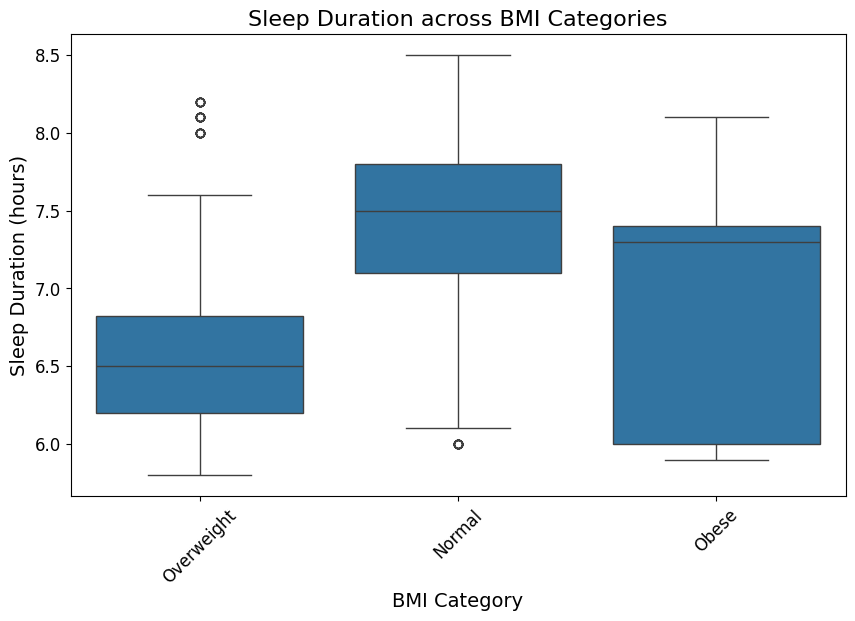

In [ ]:
# Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to compare the distribution of Sleep Duration across BMI Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df_data)
plt.title('Sleep Duration across BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Sleep Duration (hours)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-5-55ce51c14c33>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_data, x='BMI Category', y='Daily Steps', ci=None)#, order=df_data['BMI Category'].value_counts().index)


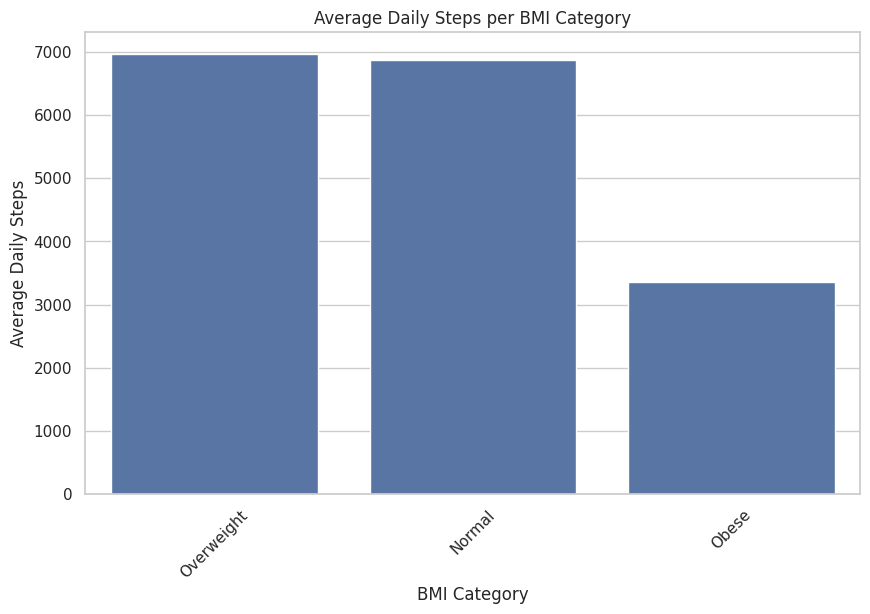

<ipython-input-5-55ce51c14c33>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_data,x='Occupation', y='Quality of Sleep',ci=None)


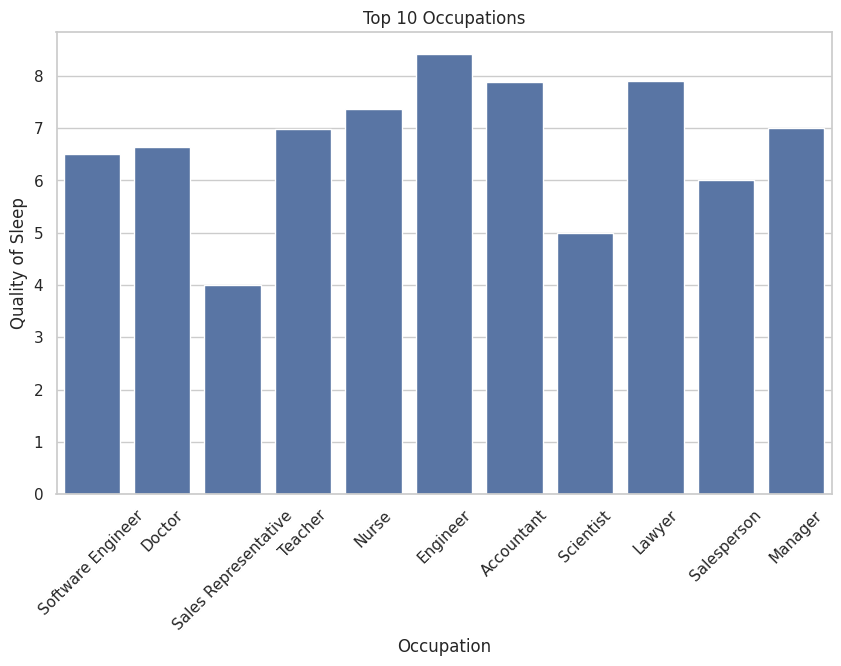

In [ ]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting BMI Category
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting average Daily Steps by BMI Category
plt.figure(figsize=(10, 6))
sns.barplot(data=df_data, x='BMI Category', y='Daily Steps', ci=None)
plt.title('Average Daily Steps per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Daily Steps')
plt.xticks(rotation=45)
plt.show()

# Plotting Occupation (top 10)
plt.figure(figsize=(10, 6))
#occupation_counts = df_data['Occupation'].value_counts().nlargest(10)
sns.barplot(data=df_data,x='Occupation', y='Quality of Sleep',ci=None)
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()


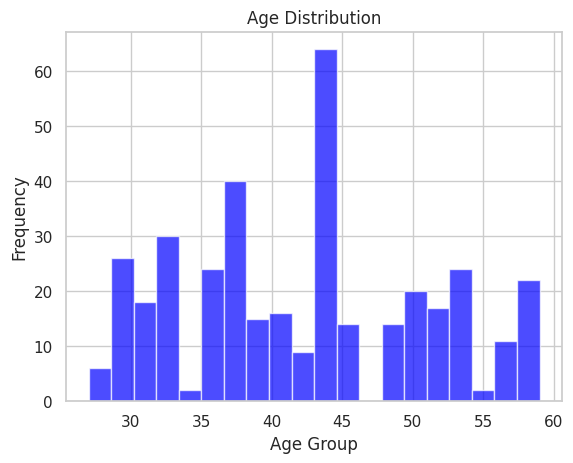

In [ ]:
plt.hist(df_data['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

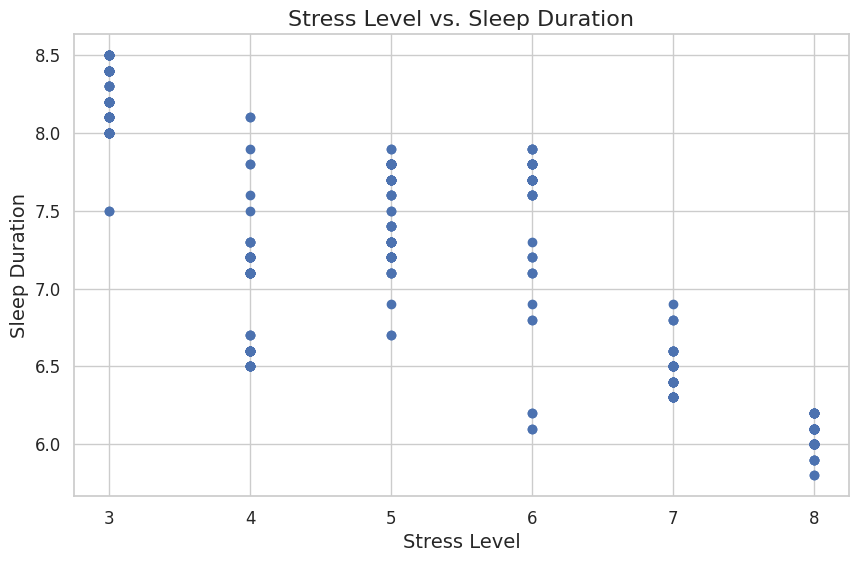

In [ ]:
#scatter plot

import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between Sleep Duration and Physical Activity Level
plt.figure(figsize=(10, 6))
plt.scatter(df_data['Stress Level'], df_data['Sleep Duration'])
plt.title('Stress Level vs. Sleep Duration', fontsize=16)
plt.xlabel('Stress Level', fontsize=14)
plt.ylabel('Sleep Duration', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
from statsmodels.formula.api import ols


# Correcting the formula by encapsulating variable names with spaces in Q("...")
model = ols('Q("Sleep Duration") ~ Age + C(Gender) + Q("Stress Level") + Q("Physical Activity Level")', data=df_data).fit()

# Print out the statistics
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Q("Sleep Duration")   R-squared:                       0.747
Model:                             OLS   Adj. R-squared:                  0.744
Method:                  Least Squares   F-statistic:                     272.4
Date:                 Fri, 03 May 2024   Prob (F-statistic):          1.02e-108
Time:                         16:59:07   Log-Likelihood:                -187.66
No. Observations:                  374   AIC:                             385.3
Df Residuals:                      369   BIC:                             404.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

Unique classes in the target variable: ['No' 'Sleep Apnea' 'Insomnia']


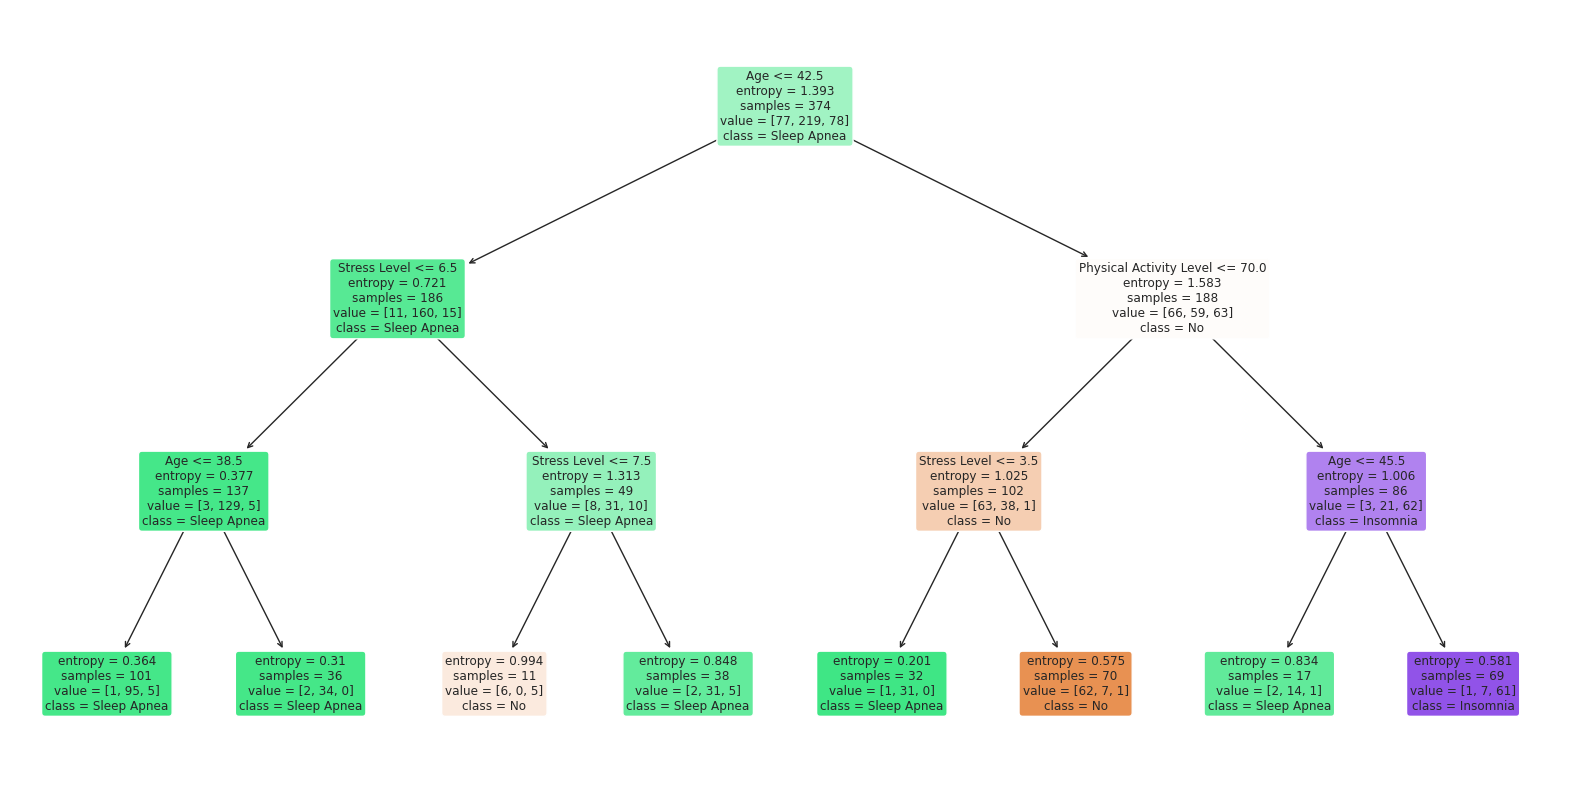

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame
y = df_data["Sleep Disorder"]
IVs = ['Age', 'Physical Activity Level', 'Stress Level']
X = df_data[IVs]

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = dtree.fit(X, y)

# Check unique classes in the target column
unique_classes = y.unique()
print("Unique classes in the target variable:", unique_classes)

# Plotting the decision tree
plt.figure(figsize=(20, 10))
# Ensure class_names matches the unique values from your y
plot_tree(model, filled=True, feature_names=IVs, class_names=unique_classes, rounded=True)
plt.show()
